In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
from pandas import Series, DataFrame

In [4]:
sns.set_style('whitegrid')

In [5]:
from pandas_datareader import DataReader

In [6]:
from datetime import datetime

In [7]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.318770,190.252698,192.269008,192.301945,3.256056e+07,190.705531
std,21.216679,20.941003,21.071273,21.027983,1.389687e+07,20.850288
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.747501,174.872501,174.832497,2.291840e+07,173.452965
50%,199.055000,193.930000,196.434998,197.000000,2.942395e+07,195.877899
75%,209.260006,205.594994,207.717499,207.912502,3.883658e+07,206.560455
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,228.523819


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-09-10 to 2019-09-10
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


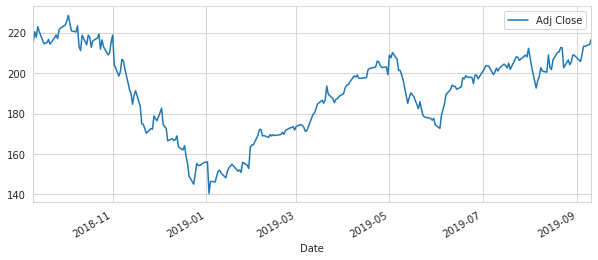

In [12]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

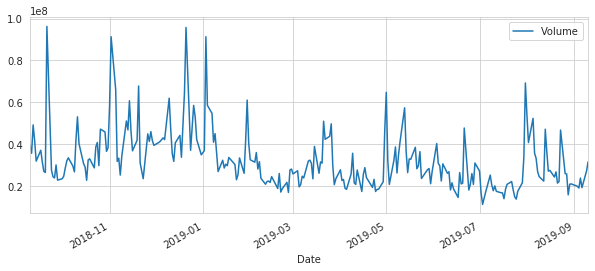

In [13]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

# idou heikin

In [14]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    APPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [15]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

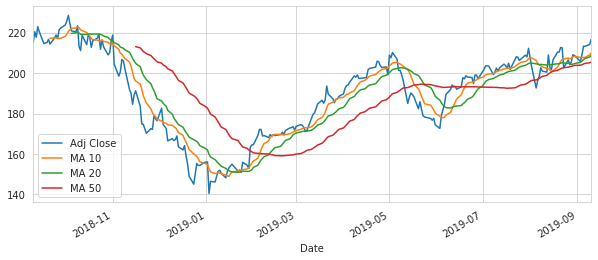

In [16]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [18]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2018-09-10,221.850006,216.470001,220.949997,218.330002,39516500.0,214.993759,NaN,NaN,NaN,NaN
2018-09-11,224.300003,216.559998,218.009995,223.850006,35749000.0,220.429443,NaN,NaN,NaN,0.025283
2018-09-12,225.000000,219.839996,224.940002,221.070007,49278700.0,217.691925,NaN,NaN,NaN,-0.012419
2018-09-13,228.350006,222.570007,223.520004,226.410004,41706400.0,222.950317,NaN,NaN,NaN,0.024155
2018-09-14,226.839996,222.520004,225.750000,223.839996,31999300.0,220.419571,NaN,NaN,NaN,-0.011351


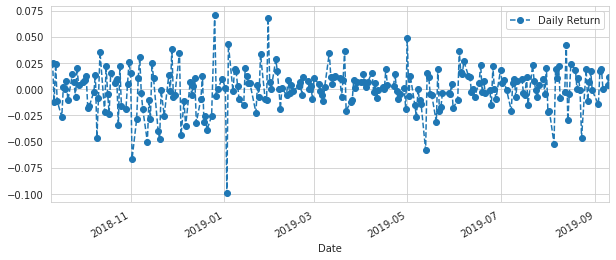

In [19]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

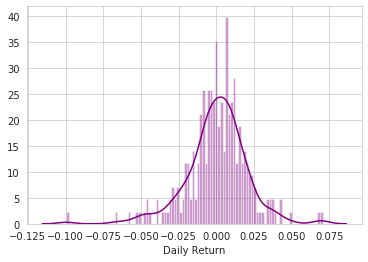

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

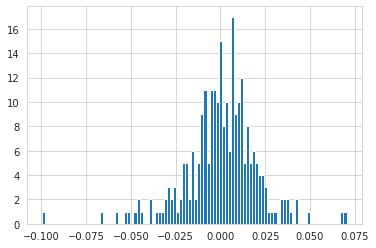

In [21]:
AAPL['Daily Return'].hist(bins=100)

In [22]:
closing_df = DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'],
                        'yahoo', start, end)['Adj Close']

In [23]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-09-10,214.993759,1164.640015,107.687813,1939.010010
2018-09-11,220.429443,1177.359985,109.519043,1987.150024
2018-09-12,217.691925,1162.819946,109.981766,1990.000000
2018-09-13,222.950317,1175.329956,111.163208,1989.869995
2018-09-14,220.419571,1172.530029,111.616089,1970.189941


In [24]:
tech_rets = closing_df.pct_change()

In [25]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-09-10,NaN,NaN,NaN,NaN
2018-09-11,0.025283,0.010922,0.017005,0.024827
2018-09-12,-0.012419,-0.012350,0.004225,0.001434
2018-09-13,0.024155,0.010758,0.010742,-0.000065
2018-09-14,-0.011351,-0.002382,0.004074,-0.009890


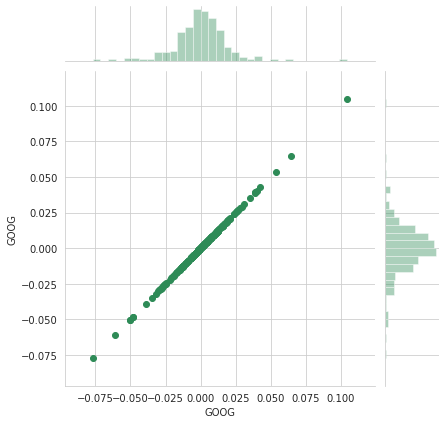

In [26]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

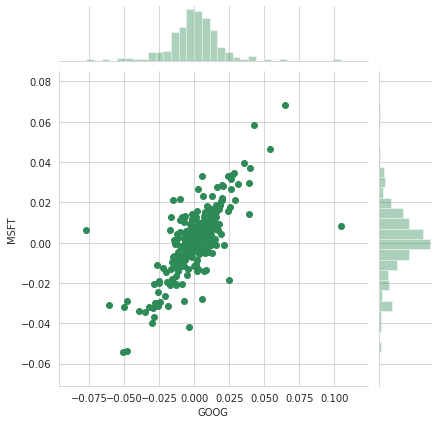

In [27]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

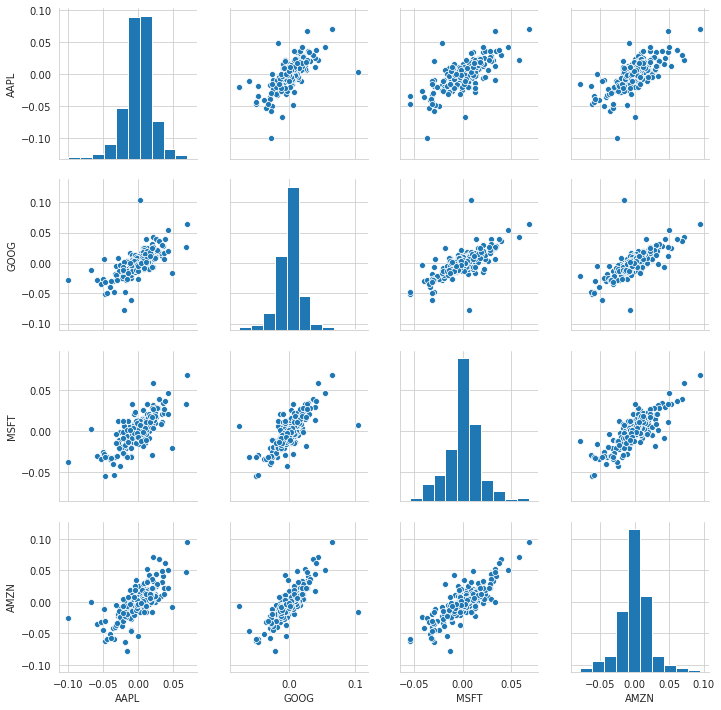

In [28]:
sns.pairplot(tech_rets.dropna())

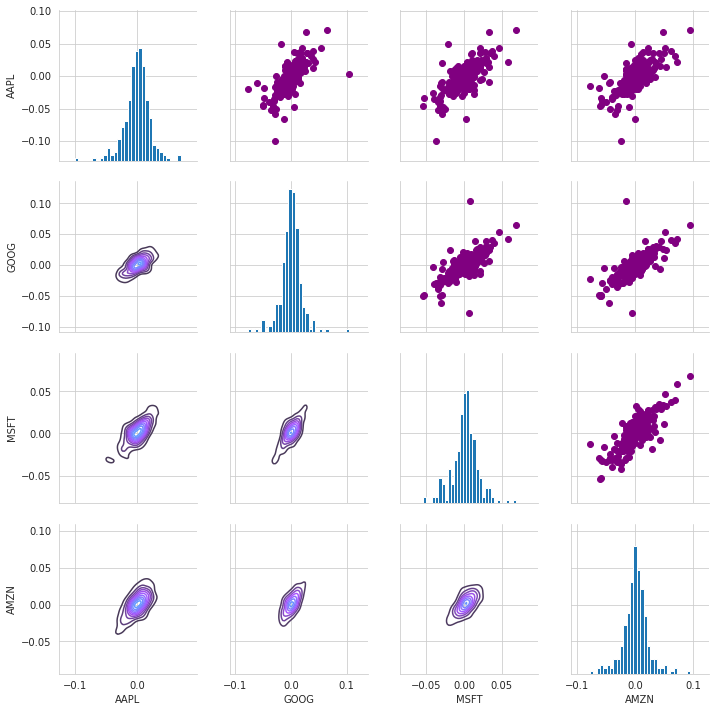

In [29]:
retures_fig = sns.PairGrid(tech_rets.dropna())
retures_fig.map_upper(plt.scatter, color= 'purple')
retures_fig.map_lower(sns.kdeplot, cmap='cool_d')
retures_fig.map_diag(plt.hist, bins=30)

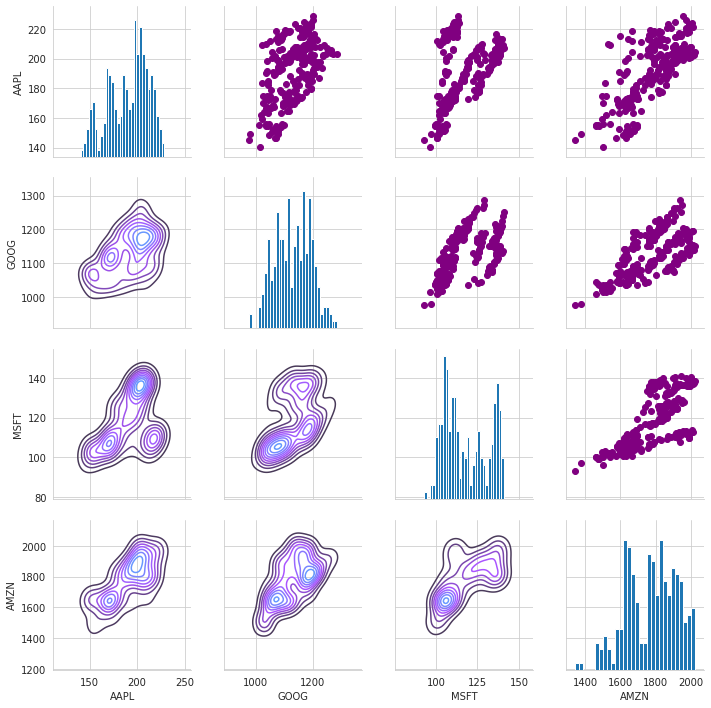

In [30]:
retures_fig = sns.PairGrid(closing_df)
retures_fig.map_upper(plt.scatter, color= 'purple')
retures_fig.map_lower(sns.kdeplot, cmap='cool_d')
retures_fig.map_diag(plt.hist, bins=30)

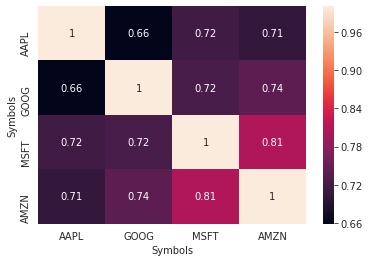

In [31]:
sns.heatmap(tech_rets.corr(), annot=True)

In [32]:
rets = tech_rets.dropna()

In [33]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-09-11,0.025283,0.010922,0.017005,0.024827
2018-09-12,-0.012419,-0.012350,0.004225,0.001434
2018-09-13,0.024155,0.010758,0.010742,-0.000065
2018-09-14,-0.011351,-0.002382,0.004074,-0.009890
2018-09-17,-0.026626,-0.014055,-0.010849,-0.031550


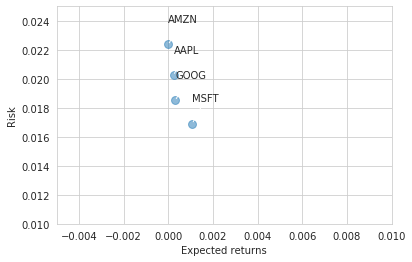

In [34]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi* 20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext = (0, 30),
                 textcoords = 'offset points', ha = 'left', va='top',
                 arrowprops = dict(arrowstyle='-', connectionstyle='arc3'))

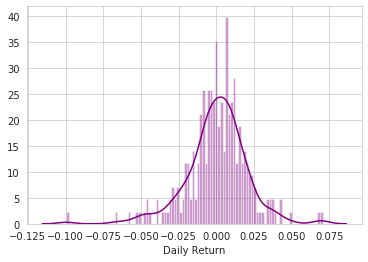

In [35]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [39]:
rets['AAPL'].quantile(0.05)

-0.03314964823286293

In [40]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [41]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x]= price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [42]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-10,1174.540039,1160.109985,1172.189941,1164.640015,1115400,1164.640015
2018-09-11,1178.680054,1156.239990,1161.630005,1177.359985,1209300,1177.359985
2018-09-12,1178.609985,1158.359985,1172.719971,1162.819946,1295500,1162.819946
2018-09-13,1178.609985,1162.849976,1170.739990,1175.329956,1431200,1175.329956
2018-09-14,1180.425049,1168.329956,1179.099976,1172.530029,944000,1172.530029


Text(0.5, 1.0, 'Monte carlo Analysis')

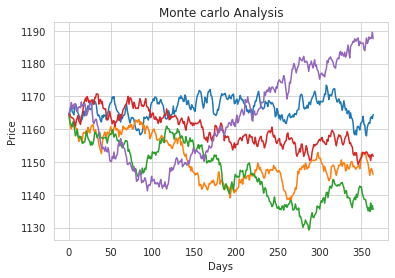

In [43]:
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo Analysis')

In [44]:
runs = 10000
simlations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simlations[run]= stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([2., 3., 3., ..., 2., 0., 3.]),
 array([1085.14448472, 1090.67170921, 1096.1989337 , ..., 1239.90677044,
        1245.43399493, 1250.96121942]),
 <a list of 30 Patch objects>)

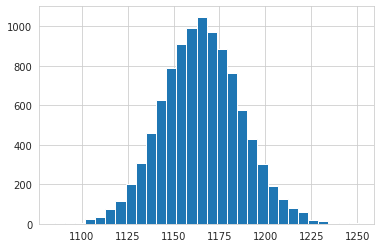

In [45]:
plt.hist(simlations, bins=30)